In [1]:
# Here we take care of paths.

from pathlib import Path
import os
print('Starting path:' + os.getcwd())
if os.getcwd()[-16:] == 'image-to-tex-OCR':
    pass
else:
    PATH = Path().resolve().parents[0]
    os.chdir(PATH)

# make sure you are in Paragraph_to_Tex folder
print('Current path:' + os.getcwd())

Starting path:/Users/gregory/PROJECT_ML/PROJECT_AMINE/image-to-tex-OCR/Jupyter_Notebooks
Current path:/Users/gregory/PROJECT_ML/PROJECT_AMINE/image-to-tex-OCR


In [5]:


# Import the Data Modules and other stuff

from Data.Handwritten_Data_module import Handwritten_Data_Module
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms
from IPython.display import display, Math
from Models.Printed_Tex_Transformer import ResNetTransformer
from Lightning_Models.Printed_Tex_Lit_Model import LitResNetTransformer
import numpy as np
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger
from torchvision import transforms
torch.cuda.is_available()

False

In [5]:

IMAGES_PATH = PATH/'Data'/'Data_Bank'/'images'


from os import listdir
from os.path import isfile, join
file_names = [f[:-4] for f in listdir(IMAGES_PATH) if isfile(join(IMAGES_PATH, f))]

In [6]:
FORMULAS_PATH =  PATH/'Data'/'Data_Bank'/'formulas.norm.lst'
formulas = open(FORMULAS_PATH).read().split('\n')
len(formulas)

99553

In [5]:
from os import listdir
from os.path import isfile, join
IMAGES_PATH = PATH/'Data'/'Data_Bank'/'images'
PATH_TO_LIST = PATH/'Data'/'Data_Bank'/'val.lst'
# in train.lst remove lines that have no corresponding images

def remove_bad_image_ids(path_to_images, path_to_list):
    new_list = []
    bad_list = []
    
    #  get a list of all image names withput png in folder
    file_names = [f[:-4] for f in listdir(IMAGES_PATH) if isfile(join(IMAGES_PATH, f))]
    file_names.remove('.DS_S')
    file_names = [ int(f) for f in file_names]
    
    
    # get a list of all image names in lst
    with open(path_to_list, 'r') as file_train_list:
        for line in file_train_list.readlines():
            #line.strip()
            l = line.split(' ')
            image_name = int(l[1]) #+ '.png'
            if image_name in file_names:
                new_list.append(line)
            else:
                bad_list.append(line)

            
    return bad_list
    # return a new lst list with bad ids removed


# Remove any empty lines


In [6]:
l=[]
with open(PATH_TO_LIST, 'r') as file:
    lines=file.read().split('\n')
    l = lines
    
    
    
    

In [7]:
'\n' in l

False

In [6]:
'''
path_to_formulas = 'Data/Data_Bank/formulas.lst',
                  path_to_image_names= 'Data/Data_Bank/images',


'''


dataset = Handwritten_Data_Module(stage = 'fit',
                 set_max_label_length = 256,
                 number_png_images_to_use_in_dataset=200*1000,
                 labels_transform='default',
                image_transform_name ='alb',
                 train_val_fraction = 0.95,
                
                load_vocabulary = False,
                 


                 batch_size = 64,
                num_workers = 0,
                data_on_gpu = False,
                )



# Generates the dataframe from the images and formulas
# images need to be in the folder Data/Data_Bank/generated_png_images
# formulas need to be in Data/Data_Bank/final_png_formulas.txt
# image filenames need to be in Data/Data_Bank/corresponding_png_images.txt
dataset.prepare_data()

# if one wants to load a vocabulary do not use data.prepare_dataframe(), 
# but instead set load_vocabulary = True


In [7]:
dataset.setup()

Train/Val Data is ready for Model loading.


In [8]:
print( 
    'Vocabulary size:',len(dataset.vocabulary),
    "\nTrain-Dataset size:", len(dataset.data_train),
    "\nValidation-Dataset size:", len(dataset.data_val),
    '\nMax label length:', dataset.max_label_length,
    "\nStart <S> goes to index ",dataset.vocabulary['<S>'],
      "\nEnd <E> goes to index ",dataset.vocabulary['<E>'],
      "\nPadding <P> goes to index ",dataset.vocabulary['<P>'],
)

Vocabulary size: 550 
Train-Dataset size: 75106 
Validation-Dataset size: 3953 
Max label length: 258 
Start <S> goes to index  0 
End <E> goes to index  1 
Padding <P> goes to index  2


In [19]:
dataset.df

,formula,image_name,height,width,formula_length,latex_tokenized,tokenized_len
0,d G ^ { * ( 5 ) } = { \frac { 1 } { 4 } } J ^ ...,37436.png,50,200,59,"[d, G, ^, {, *, (, 5, ), }, =, {, \frac, {, 1,...",28
1,y \propto \left[ \operatorname { c o t } ( \et...,50043.png,40,200,95,"[y, \propto, \left[, \operatorname, {, c, o, t...",30
2,"A \, = \, \left( \begin{array} { c c c } { 0 }...",82314.png,100,500,434,"[A, \,, =, \,, \left(, \begin{array}, {, c, c,...",160
3,a G ( \phi ) \frac { \partial \rho } { \partia...,57179.png,60,360,110,"[a, G, (, \phi, ), \frac, {, \partial, \rho, }...",32
4,J \equiv \left. { \frac { \delta S _ { \mathrm...,33934.png,60,360,118,"[J, \equiv, \left., {, \frac, {, \delta, S, _,...",35
...,...,...,...,...,...,...,...
79543,D _ { \mu } f = \partial _ { \mu } f - { \frac...,36863.png,100,600,252,"[D, _, {, \mu, }, f, =, \partial, _, {, \mu, }...",102
79544,"F ( \bar { y } , z ) = \sum _ { s } \oint \fra...",89587.png,100,600,302,"[F, (, \bar, {, y, }, ,, z, ), =, \sum, _, {, ...",120
79545,X _ { d } = \mathrm { d i a g } \left( x _ { 1...,47969.png,100,500,187,"[X, _, {, d, }, =, \mathrm, {, d, i, a, g, }, ...",71
79546,\operatorname* { l i m } _ { \tau \rightarrow ...,76373.png,40,200,99,"[\operatorname*, {, l, i, m, }, _, {, \tau, \r...",31


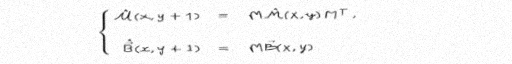

In [18]:
transform = transforms.ToPILImage()
display(transform(dataset.data_train[3][0]))


In [12]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")


In [13]:
model = ResNetTransformer(dataset=dataset).to(dev)

/Users/gregory/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/gregory/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [14]:
logger = TensorBoardLogger("Models_Parameters_Log", name="Test_Run_Local_HW")
lit_model = LitResNetTransformer(model=model)

#use the lit_model to run with Trainer
trainer = Trainer(accelerator='cpu', devices=1,  max_epochs=60, logger=logger, auto_lr_find=True) #accumulate_grad_batches=2, overfit_batches=1, default_root_dir="lightning_logs/ResNet/checkpoints"  
trainer.fit(model=lit_model, datamodule=dataset,)

# ckpt_path='Models_Parameters_Log/Test_Run_HW/version_11/checkpoints/epoch=39-step=55888.ckpt'


wandb: Currently logged in as: gmarus. Use `wandb login --relogin` to force relogin


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/gregory/opt/anaconda3/lib/python3.9/site-packages/pytorch_lightning/trainer/setup.py:200: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(
Missing logger folder: Models_Parameters_Log/Test_Run_Local_HW

  | Name     | Type               | Params
------------------------------------------------
0 | model    | ResNetTransformer  | 3.8 M 
1 | loss_fn  | CrossEntropyLoss   | 0     
2 | val_cer  | CharacterErrorRate | 0     
3 | test_cer | CharacterErrorRate | 0     
------------------------------------------------
3.8 M     Trainable params
0         Non-trainable params
3.8 M     Total params
15.009    Total estimated model params size (MB)


Train/Val Data is ready for Model loading.


Sanity Checking: 0it [00:00, ?it/s]

/Users/gregory/opt/anaconda3/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 10 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


AttributeError: Can't pickle local object 'EvaluationLoop.advance.<locals>.batch_to_device'